In [1]:
import ROOT
from ROOT import *
import numpy as np
import ctypes

from constants import *

Welcome to JupyROOT 6.22/06


In [2]:
ROOT.gRandom.SetSeed(0)
ROOT.gStyle.SetOptStat(0)
#ROOT.gStyle.SetMarkerStyle(kPlus)
rng = ROOT.TRandom3()

## Read in double differential xscn file

In [9]:
path = '../data/ibd/ibdxscnDoubleDiff.txt'
xscn = TH2F("ibd_double_diff_xscn", "IBD Double Differential Cross Section", 200, 0.5, 200.5, 20, -1, 1)
xscn_file = np.loadtxt(path, delimiter=" ")

for line in xscn_file:
    energy = line[0]
    for i in range(1, line.size):
        angle = -0.95 + 0.1*(i-1) # center of the bin
        xscn.Fill(energy, angle, line[i])


Warning in <TROOT::Append>: Replacing existing TH1: ibd_double_diff_xscn (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


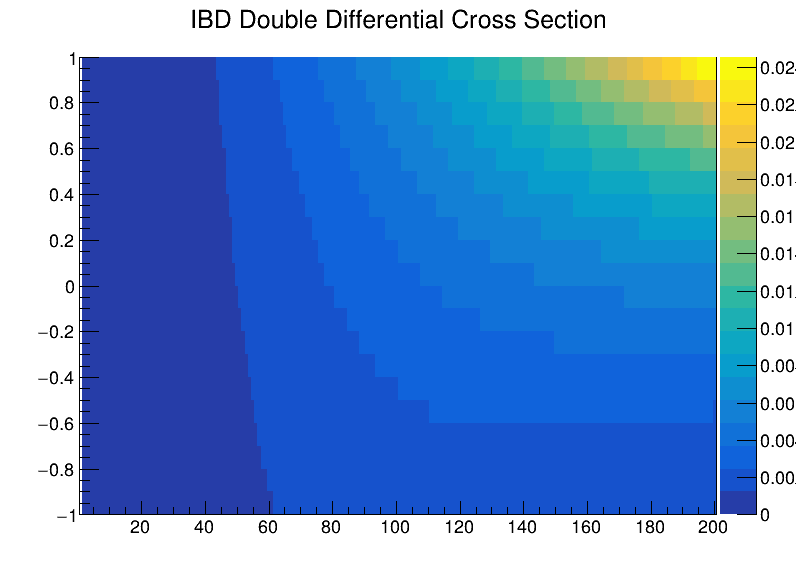

In [18]:
c1 = TCanvas("c1", "c1", 800, 600)
prof_x = xscn.ProfileX()
#prof_x.Draw()
xscn.Draw("colz")
c1.Draw()

In [17]:
def get_e_angle(nu_energy):
    nbin = xscn.GetXaxis().FindBin(nu_energy)
    py = xscn.ProjectionY("projection_y", nbin, nbin)
    ret = py.GetRandom()
    py.Delete()
    return ret